In [34]:
import numpy as np

In [202]:
e = [k for k in range(-1,4)]
e

[-1, 0, 1, 2, 3]

In [17]:
1e-18

1e-18

In [7]:
print(np.finfo(float).eps)

2.220446049250313e-16


In [10]:
(1 - 1) + 10**-16

1e-16

In [11]:
1 - ( 1 + 1e-16)

0.0

In [18]:
1/16

0.0625

2c

In [3]:
rest = 0.2
for k in range(0,20):
    print(k)
    if rest - 2**-k > 0:
        rest = rest - 2**-k
        print("-",rest)

0
1
2
3
- 0.07500000000000001
4
- 0.012500000000000011
5
6
7
- 0.004687500000000011
8
- 0.0007812500000000111
9
10
11
- 0.0002929687500000111
12
- 4.88281250000111e-05
13
14
15
- 1.8310546875011102e-05
16
- 3.0517578125111022e-06
17
18
19
- 1.1444091796986022e-06


In [6]:
for n in [0.2,1/2]:
    print(0.1 * n + 0.1 * n + 0.1 * n == 0.3*n)

False
False


In [8]:
n = 1/2
0.1 * n + 0.1 * n + 0.1 * n

0.15000000000000002

3


In [13]:
import scipy.linalg


In [20]:
scipy.linalg.invhilbert(3).shape

(3, 3)

In [17]:
from sympy import *

In [122]:
def mult(n):
    return (scipy.linalg.hilbert(n)) @ ( (scipy.linalg.invhilbert(n)) @ (np.ones(n)) )

In [136]:
def norm(x,y):
    z = x -y
    z = z ** 2
    return np.sqrt(z)

In [123]:
H_5 = mult(5)
H_10 = mult(10)
H_20 = mult(20)

In [135]:
mult(13)

array([-4.29696977, -3.78787881, -3.36829837, -3.01648352, -2.7172161 ,
       -2.45952381, -2.23529413, -2.03839868, -1.86412106, -1.70877196,
       -1.56942356, -1.44372292, -1.3297572 ])

In [213]:
#eucld(x -y)
for k in range(0,21,5):
    print(norm(mult(k), np.ones(k)))

[]
[0.00000000e+00 0.00000000e+00 1.42108547e-14 0.00000000e+00
 0.00000000e+00]
[0.00000000e+00 0.00000000e+00 1.16415322e-10 0.00000000e+00
 2.91038305e-11 2.91038305e-11 1.16415322e-10 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[4678.8663342  4289.48443604 3959.22219968 3675.76934767 3429.94091201
 3214.77296579 3024.9022826  2856.13759851 2705.15927505 2569.30567312
 2446.41880667 2334.73119318 2232.78169227 2139.3521322  2053.41895878]
[2.37319672e+11 2.22180924e+11 2.08861754e+11 1.97052510e+11
 1.86509983e+11 1.77040524e+11 1.68488051e+11 1.60725360e+11
 1.53647747e+11 1.47168247e+11 1.41214024e+11 1.35723617e+11
 1.30644801e+11 1.25932913e+11 1.21549533e+11 1.17461427e+11
 1.13639701e+11 1.10059116e+11 1.06697525e+11 1.03535416e+11]


In [108]:
# def hilbert(y,n):
#     for j in range(0,n ):
#         sum = 0
#         for i in range(0,n):
            
            
#             sum += nsimplify(1/(j+i + 1)) * nsimplify(y[i])
#         print(sum)
#     return 0

In [236]:
for n in range(5,21,5):
    k = np.linalg.norm(scipy.linalg.invhilbert(n),ord=2) * np.linalg.norm(scipy.linalg.hilbert(n),ord=2)
    print(n," |H| * |H**-1| = ",k)

5  |H| * |H**-1| =  476607.250242561
10  |H| * |H**-1| =  16026286870216.885
15  |H| * |H**-1| =  6.11656579161984e+20
20  |H| * |H**-1| =  2.452156585815303e+28


<img src="./img/5diff.PNG"><img>

In [158]:
def approx(f,e):
    k = 0
    while(k <= 16):
        k += 1
        h = 10**-k
        f_k = ( f(e + h) - f(e) ) / h
        print(h)
    return 

In [159]:
def f(x):
    return np.exp(x) / ( np.cos(x)**3 + np.sin(x)**3)

In [186]:
def approx_h(f,e,k):
    h = 10**-k
    f_k = ( f(e + h) - f(e) ) / h
    return f_k

In [ ]:
points = np.linspace(0,16,17)
points

In [170]:
import matplotlib.pyplot as plt

In [180]:
x_o = 3.101766393836051

In [238]:
np.abs(approx_h(f,np.pi/4,points))

array([ 3.35690848,  2.76094902,  3.07034509,  3.0986605 ,  3.10145618,
        3.10173538,  3.10176329,  3.10176609,  3.10176649,  3.10176773,
        3.10176773,  3.10191872,  3.10285131,  3.10418358,  3.24185123,
        3.99680289, 17.76356839])

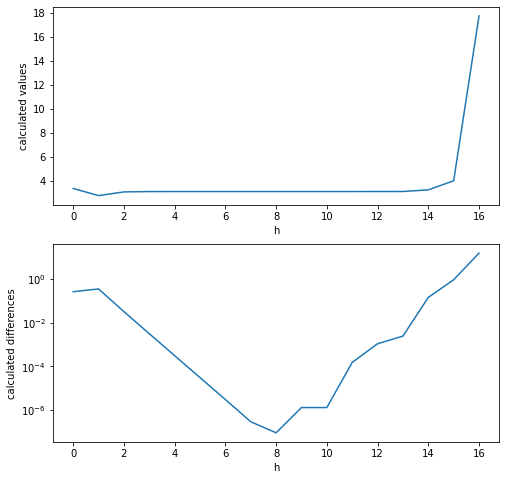

In [237]:
fig, axs = plt.subplots(2,figsize=(8, 8))
axs[0].set_xlabel("h")
axs[0].set_ylabel("calculated values")
axs[0].plot(points, np.abs(approx_h(f,np.pi/4,points)))

axs[1].set_yscale('log')
axs[1].set_xlabel("h")
axs[1].set_ylabel("calculated differences")
axs[1].plot(points, np.abs(approx_h(f,np.pi/4,points) - x_o))

In [199]:
approx_h(f,np.pi/4,points) - x_o

array([ 2.55142088e-01, -3.40817373e-01, -3.14213000e-02, -3.10589225e-03,
       -3.10217974e-04, -3.10180038e-05, -3.10140144e-06, -3.00974882e-07,
        9.42645149e-08,  1.33771430e-06,  1.33771430e-06,  1.52328046e-04,
        1.08491539e-03,  2.41718302e-03,  1.40084838e-01,  8.95036495e-01,
        1.46618020e+01])

An important consideration in practice when the function is calculated using floating-point arithmetic of finite precision is the choice of step size, h. If chosen too small, the subtraction will yield a large rounding error. In fact, all the finite-difference formulae are ill-conditioned[4] and due to cancellation will produce a value of zero if h is small enough.[5]